In [34]:
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [35]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender = pd.read_csv('data/gender_submission.csv')

train['Age'] = train['Age'].fillna(29.6)
test['Age'] = test['Age'].fillna(29.6)

train['Fare'] = train['Fare'].fillna(32.2)
test['Fare'] = test['Fare'].fillna(32.2)

train['Age'] = train['Age'] / 80
test['Age'] = test['Age'] / 80

train['Pclass'] = train['Pclass'] / 3
test['Pclass'] = test['Pclass'] / 3

train['SibSp'] = train['SibSp'] / 5
test['SibSp'] = test['SibSp'] / 5

train['Parch'] = train['Parch'] / 6
test['Parch'] = test['Parch'] / 6

train['Fare'] = train['Fare'] / 520
test['Fare'] = test['Fare'] / 520

train= pd.concat([train, pd.get_dummies(train['Sex'])], axis=1)
test= pd.concat([test, pd.get_dummies(test['Sex'])], axis=1)

train= pd.concat([train, pd.get_dummies(train['Embarked'])], axis=1)
test= pd.concat([test, pd.get_dummies(test['Embarked'])], axis=1)


mask = np.random.rand(len(train)) < 0.8
train, valid = train[mask], train[~mask]
# print(train)
# print(valid)

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_dim=10, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

checkpoint_path = "my_checkpoint.ckpt"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

In [37]:


train_x = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'C', 'Q', 'S']]
train_y = train['Survived']

valid_x = valid[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'C', 'Q', 'S']]
valid_y = valid['Survived']

history = model.fit(
    train_x, train_y, epochs=100,
    validation_data=(valid_x, valid_y),
    batch_size=1,
    callbacks=[checkpoint])

model.load_weights(checkpoint_path)

Epoch 1/100
708/708 [==============================] - 0s 437us/step - loss: 0.5998 - acc: 0.6709 - val_loss: 0.5342 - val_acc: 0.7923

Epoch 00001: val_loss improved from inf to 0.53415, saving model to my_checkpoint.ckpt
Epoch 2/100
708/708 [==============================] - 0s 332us/step - loss: 0.5288 - acc: 0.8043 - val_loss: 0.5198 - val_acc: 0.8142

Epoch 00002: val_loss improved from 0.53415 to 0.51980, saving model to my_checkpoint.ckpt
Epoch 3/100
708/708 [==============================] - 0s 330us/step - loss: 0.5111 - acc: 0.8160 - val_loss: 0.5094 - val_acc: 0.8033

Epoch 00003: val_loss improved from 0.51980 to 0.50944, saving model to my_checkpoint.ckpt
Epoch 4/100
708/708 [==============================] - 0s 334us/step - loss: 0.5110 - acc: 0.7844 - val_loss: 0.5061 - val_acc: 0.8033

Epoch 00004: val_loss improved from 0.50944 to 0.50611, saving model to my_checkpoint.ckpt
Epoch 5/100
708/708 [==============================] - 0s 330us/step - loss: 0.5120 - acc: 0.802

708/708 [==============================] - 0s 346us/step - loss: 0.3774 - acc: 0.8662 - val_loss: 0.4870 - val_acc: 0.7978

Epoch 00042: val_loss did not improve from 0.44595
Epoch 43/100
708/708 [==============================] - 0s 328us/step - loss: 0.4087 - acc: 0.8278 - val_loss: 0.4692 - val_acc: 0.7869

Epoch 00043: val_loss did not improve from 0.44595
Epoch 44/100
708/708 [==============================] - 0s 339us/step - loss: 0.3711 - acc: 0.8511 - val_loss: 0.4816 - val_acc: 0.7814

Epoch 00044: val_loss did not improve from 0.44595
Epoch 45/100
708/708 [==============================] - 0s 338us/step - loss: 0.3942 - acc: 0.8457 - val_loss: 0.4816 - val_acc: 0.7923

Epoch 00045: val_loss did not improve from 0.44595
Epoch 46/100
708/708 [==============================] - 0s 329us/step - loss: 0.3926 - acc: 0.8402 - val_loss: 0.4822 - val_acc: 0.7814

Epoch 00046: val_loss did not improve from 0.44595
Epoch 47/100
708/708 [==============================] - 0s 330us/step - l


Epoch 00085: val_loss did not improve from 0.44595
Epoch 86/100
708/708 [==============================] - 0s 329us/step - loss: 0.3844 - acc: 0.8509 - val_loss: 0.5417 - val_acc: 0.7705

Epoch 00086: val_loss did not improve from 0.44595
Epoch 87/100
708/708 [==============================] - 0s 327us/step - loss: 0.3531 - acc: 0.8726 - val_loss: 0.5108 - val_acc: 0.7814

Epoch 00087: val_loss did not improve from 0.44595
Epoch 88/100
708/708 [==============================] - 0s 326us/step - loss: 0.3530 - acc: 0.8579 - val_loss: 0.5144 - val_acc: 0.7869

Epoch 00088: val_loss did not improve from 0.44595
Epoch 89/100
708/708 [==============================] - 0s 326us/step - loss: 0.3267 - acc: 0.8679 - val_loss: 0.5173 - val_acc: 0.7705

Epoch 00089: val_loss did not improve from 0.44595
Epoch 90/100
708/708 [==============================] - 0s 328us/step - loss: 0.4052 - acc: 0.8414 - val_loss: 0.5130 - val_acc: 0.7814

Epoch 00090: val_loss did not improve from 0.44595
Epoch 91

In [38]:
model.evaluate(valid_x, valid_y)

6/6 [==============================] - 0s 970us/step - loss: 24.5845 - acc: 0.4153


[24.58445930480957, 0.41530054807662964]

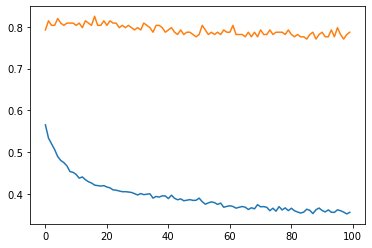

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_acc'])

In [42]:
# test['Predict'] = model.predict(test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'C', 'Q', 'S']])
model.predict(test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'C', 'Q', 'S']])
test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'C', 'Q', 'S']]

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1.000000,0.43125,0.0,0.000000,0.015056,0,1,0,1,0
1,1.000000,0.58750,0.2,0.000000,0.013462,1,0,0,0,1
2,0.666667,0.77500,0.0,0.000000,0.018630,0,1,0,1,0
3,1.000000,0.33750,0.0,0.000000,0.016659,0,1,0,0,1
4,1.000000,0.27500,0.2,0.166667,0.023630,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1.000000,0.37000,0.0,0.000000,0.015481,0,1,0,0,1
414,0.333333,0.48750,0.0,0.000000,0.209423,1,0,1,0,0
415,1.000000,0.48125,0.0,0.000000,0.013942,0,1,0,0,1
416,1.000000,0.37000,0.0,0.000000,0.015481,0,1,0,0,1


In [8]:
test.loc[test['Predict'] < 0.5, 'Survived'] = 0
test.loc[test['Predict'] >= 0.5, 'Survived'] = 1
test['Survived'] = test['Survived'].astype(int)

KeyError: 'Predict'

In [ ]:
test[['PassengerId', 'Survived']].to_csv("submission.csv", index=False)

In [ ]:

test[['PassengerId', 'Survived']].info()